In [15]:
%matplotlib inline
import matplotlib.image as mpimg
from scipy import ndimage
from skimage.transform import rotate,resize
from skimage.morphology import binary_opening, binary_closing, binary_dilation,binary_erosion
from skimage.util import img_as_ubyte,img_as_uint,img_as_bool
from skimage.filters import gaussian
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os,sys
from PIL import Image

In [2]:
# Helper functions

def load_image(infilename):
    data = mpimg.imread(infilename)
    return data

def img_float_to_uint8(img):
    rimg = img - np.min(img)
    rimg = (rimg / np.max(rimg) * 255).round().astype(np.uint8)
    return rimg

# Concatenate an image and its groundtruth
def concatenate_images(img, gt_img):
    nChannels = len(gt_img.shape)
    w = gt_img.shape[0]
    h = gt_img.shape[1]
    if nChannels == 3:
        cimg = np.concatenate((img, gt_img), axis=1)
    else:
        gt_img_3c = np.zeros((w, h, 3), dtype=np.uint8)
        gt_img8 = img_float_to_uint8(gt_img)          
        gt_img_3c[:,:,0] = gt_img8
        gt_img_3c[:,:,1] = gt_img8
        gt_img_3c[:,:,2] = gt_img8
        img8 = img_float_to_uint8(img)
        cimg = np.concatenate((img8, gt_img_3c), axis=1)
    return cimg

def img_crop(im, w, h):
    list_patches = []
    imgwidth = im.shape[0]
    imgheight = im.shape[1]
    is_2d = len(im.shape) < 3
    for i in range(0,imgheight,h):
        for j in range(0,imgwidth,w):
            if is_2d:
                im_patch = im[j:j+w, i:i+h]
            else:
                im_patch = im[j:j+w, i:i+h, :]
            list_patches.append(im_patch)
    return list_patches

In [35]:
def filter_thresh(image,threshold,kernel_w,kernel_h):
    kernel = np.ones((kernel_h,kernel_w))
    image = ndimage.filters.convolve(image,kernel)
    image[image<threshold]=0
    image[image>=threshold]=1
    return image

def n_erosion(image,n):
    if(n<=1):
        return binary_erosion(image)
    else :
        return n_erosion(binary_erosion(image),n-1)
def n_dilation(image,n):
    if(n<=1):
        return binary_dilation(image)
    else :
        return n_dilation(binary_dilation(image),n-1)
    

In [4]:
x = np.array([[1, 2, 3],[4,5,6],[7,8,9]])
y = np.ones((3,3))
tab = np.array([x,y])
np.sum(tab,axis = 0)

array([[  2.,   3.,   4.],
       [  5.,   6.,   7.],
       [  8.,   9.,  10.]])

In [13]:

def rotate_and_filter(img,rotation_angles,threshold,length):
    img_length =len(img)
    def rotate_and_filter_one_angle(angle):
        new_img = rotate(img,angle,resize=True)
        new_img = filter_thresh(new_img,threshold,1,length)
        new_img = rotate(new_img,-1*angle,resize=True)
        new_len=len(new_img)
        idx = int((new_len-img_length)/2)
        return new_img[idx:idx+img_length,idx:idx+img_length]
        
    imgs = [rotate_and_filter_one_angle(rotation_angles[i]) for i in range(len(rotation_angles))]
    img_tot = np.sum(imgs,axis = 0)
    img_tot[img_tot >= 1] = 1
    return img_tot


(152, 152, 4)


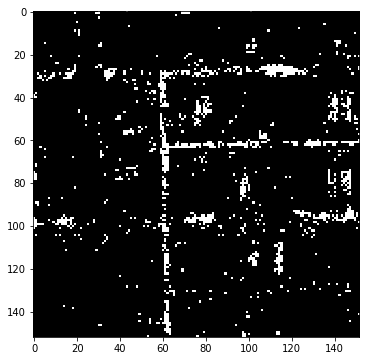

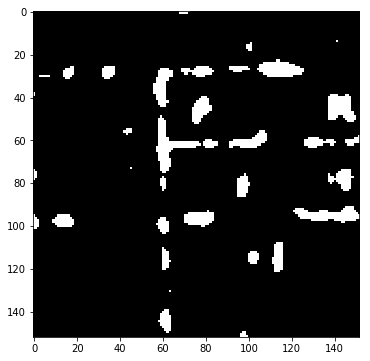

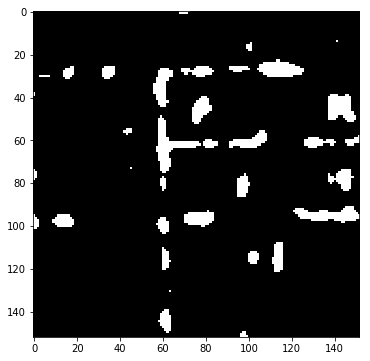

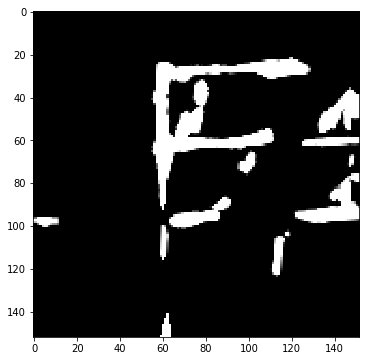

In [90]:
#load a result image
images_dir = "test_set_results/"
files = os.listdir(images_dir)
n = len(files)
#print(files)
pixel_size= 4
img_to_inspect = 7
imgs = np.array([load_image(images_dir + files[i]) for i in range(n)])
imgs = [imgs[i][::pixel_size,::pixel_size] for i in range(n)]
print(imgs[0].shape)
#mean
imgs_pure = np.mean(imgs,-1)
imgs_pure[imgs_pure==0.25]=0
test = plt.figure(figsize=(6,6))
plt.imshow(imgs_pure[img_to_inspect],cmap = "Greys_r")
#gaussian
imgs = [gaussian(imgs_pure[i],1.3) for i in range(n)]
#convol
convol = plt.figure(figsize=(6,6))
imgs = [filter_thresh(imgs[i],0.25*16,4,4) for i in range(n)]

plt.imshow(imgs[img_to_inspect],cmap = "Greys_r")
#erosion
erosio =plt.figure(figsize=(6,6))
#imgs =[n_erosion(imgs[i],1) for i in range(n)]
#imgs=[n_dilation(imgs[i],1)for i in range(n)]

plt.imshow(imgs[img_to_inspect],cmap = "Greys_r")
#rotate and filter
rotation_angles = np.arange(0,90,1)
length = int(len(imgs[0])/5)
percentage = 0.46
imgs = [rotate_and_filter(imgs[i],rotation_angles,percentage*length,length) for i in range(n)]
#imgs=[n_dilation(imgs[i],1)for i in range(n)]
#imgs =[n_erosion(imgs[i],2) for i in range(n)]

fig = plt.figure(figsize=(6,6))
plt.imshow(imgs[img_to_inspect],cmap = "Greys_r")

In [30]:
#resize images
imgs = [resize(imgs[i],(608,608)) for i in range(n)]

In [89]:
for i in range(n):
    print( "{i} {f}".format(i = i, f= files[i]))

0 img_1.png
1 img_10.png
2 img_11.png
3 img_12.png
4 img_13.png
5 img_14.png
6 img_15.png
7 img_16.png
8 img_17.png
9 img_18.png
10 img_19.png
11 img_2.png
12 img_20.png
13 img_21.png
14 img_22.png
15 img_23.png
16 img_24.png
17 img_25.png
18 img_26.png
19 img_27.png
20 img_28.png
21 img_29.png
22 img_3.png
23 img_30.png
24 img_31.png
25 img_32.png
26 img_33.png
27 img_34.png
28 img_35.png
29 img_36.png
30 img_37.png
31 img_38.png
32 img_39.png
33 img_4.png
34 img_40.png
35 img_41.png
36 img_42.png
37 img_43.png
38 img_44.png
39 img_45.png
40 img_46.png
41 img_47.png
42 img_48.png
43 img_49.png
44 img_5.png
45 img_50.png
46 img_6.png
47 img_7.png
48 img_8.png
49 img_9.png


Text(0.5,1,'After')

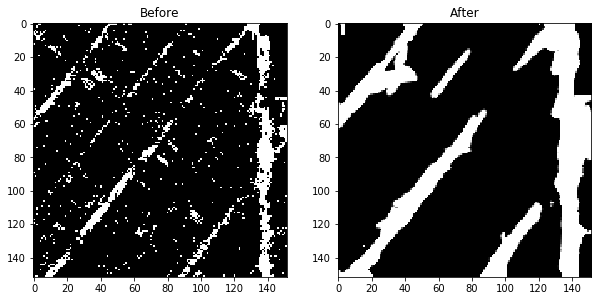

In [89]:
img_to_inspect = 45
fig = plt.figure(figsize=(10,10))
a=fig.add_subplot(1,2,1)
plt.imshow(imgs_pure[img_to_inspect],cmap = "Greys_r")
a.set_title('Before')

b=fig.add_subplot(1,2,2)
plt.imshow(imgs[img_to_inspect],cmap ="Greys_r")
b.set_title('After')


In [34]:
#save images
save_dir = "post_process/"
w=h= len(imgs[0])
print(w)
for i in range(n):
    name = save_dir+files[i]
   
    matplotlib.image.imsave(name, imgs[i], cmap ="Greys_r")

608


In [95]:
# Loaded a set of images
root_dir = "training/"

image_dir = root_dir + "images/"
files = os.listdir(image_dir)
n = min(100, len(files)) # Load maximum 20 images
print("Loading " + str(n) + " images")
imgs = [load_image(image_dir + files[i]) for i in range(n)]
print(files[0])

gt_dir = root_dir + "groundtruth/"
print("Loading " + str(n) + " images")
gt_imgs = [load_image(gt_dir + files[i]) for i in range(n)]
print(files[0])

n = 80 # Only use 10 images for training

Loading 100 images
satImage_001.png
Loading 100 images
satImage_001.png


12.6666666667


<function matplotlib.pyplot.show>

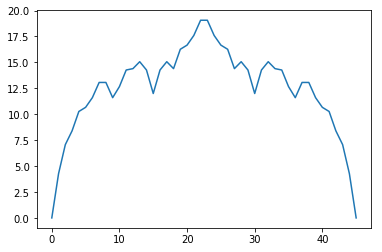

In [410]:
def corr(x,n):
    return (n-np.mod(x,n))*np.mod(x,n)/n
def correction(x):
    return corr(x,45) + corr(x,15) + corr(x,9)+corr(x,5)+corr(x,3)

print(correction(10))
y = np.arange(46)
plt.plot(y,correction(y))
plt.show

sobel size = 464,464
232.0
57


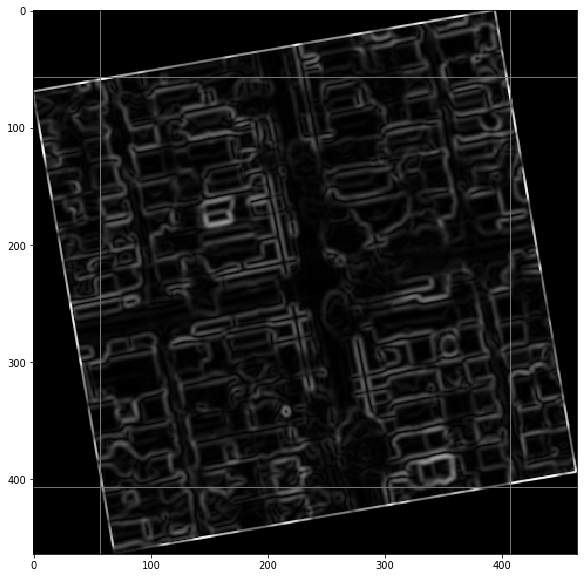

In [17]:
#print('Imagesize = ' + str(imgs[0].shape[0]) + ',' + str(imgs[0].shape[1]))
rot_angle =10
# Show first image and its groundtruth image
cimg = concatenate_images(imgs[0], gt_imgs[0])
fig1 = plt.figure(figsize=(10, 10))
gauss = ndimage.gaussian_filter(imgs[0],2)
sobel = np.mean(gauss,-1)
sobel = rotate(sobel,rot_angle,resize =True)

sx = ndimage.sobel(sobel, axis=0, mode='constant')
sy = ndimage.sobel(sobel, axis=1, mode='constant')
sob = np.hypot(sx, sy)
print("sobel size = "+ str(sob.shape[0]) + ','+ str(sob.shape[1]))
size = sob.shape[0]
print(size/2)
rot_angle = np.mod(rot_angle,90)
indx = int(np.floor(size*(1-rot_angle/90)*rot_angle/90)+correction(rot_angle)
          )+int(rot_angle == 0)
print(indx)
#sob = sob[int(np.ceil(size/4)):int(np.floor(3*size/4)),int(np.ceil(size/4)):int(np.floor(3*size/4))]
#sob = sob[indx:size-indx,indx:size-indx]
sob[indx,:] = 0.8
sob[size-indx,:] = 0.8
sob[:,indx] = 0.8
sob[:,size-indx] = 0.8
plt.imshow(sob, cmap='Greys_r')

In [72]:
# Extract patches from input images
patch_size = 16 # each patch is 16*16 pixels

img_patches = [img_crop(imgs[i], patch_size, patch_size) for i in range(n)]
gt_patches = [img_crop(gt_imgs[i], patch_size, patch_size) for i in range(n)]

# Linearize list of patches
img_patches = np.asarray([img_patches[i][j] for i in range(len(img_patches)) for j in range(len(img_patches[i]))])
gt_patches =  np.asarray([gt_patches[i][j] for i in range(len(gt_patches)) for j in range(len(gt_patches[i]))])

In [73]:
# Extract 6-dimensional features consisting of average RGB color as well as variance
def extract_features(img):
    feat_m = np.mean(img, axis=(0,1))
    feat_v = np.var(img, axis=(0,1))
    feat = np.append(feat_m, feat_v)
    return feat

# Extract 2-dimensional features consisting of average gray color as well as variance
def extract_features_2d(img):
    feat_m = np.mean(img)
    feat_v = np.var(img)
    feat = np.append(feat_m, feat_v)
    return feat

# Extract features for a given image
def extract_img_features(filename):
    img = load_image(filename)
    img_patches = img_crop(img, patch_size, patch_size)
    X = np.asarray([ extract_features(img_patches[i]) for i in range(len(img_patches))])
    return X

In [110]:
# Compute features for each image patch
foreground_threshold = 0.2 # percentage of pixels > 1 required to assign a foreground label to a patch

def value_to_class(v):
    df = np.sum(v)
    if df > foreground_threshold:
        return 1
    else:
        return 0

X = np.asarray([ extract_features(img_patches[i]) for i in range(len(img_patches))])
Y = np.asarray([value_to_class(np.mean(gt_patches[i])) for i in range(len(gt_patches))])

In [75]:
# Print feature statistics

print('Computed ' + str(X.shape[0]) + ' features')
print('Feature dimension = ' + str(X.shape[1]))
print('Number of classes = ' + str(np.max(Y)))

Y0 = [i for i, j in enumerate(Y) if j == 0]
Y1 = [i for i, j in enumerate(Y) if j == 1]
print('Class 0: ' + str(len(Y0)) + ' samples')
print('Class 1: ' + str(len(Y1)) + ' samples')

Computed 50000 features
Feature dimension = 6
Number of classes = 1
Class 0: 37115 samples
Class 1: 12885 samples


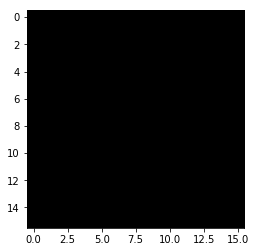

In [63]:
# Display a patch that belongs to the foreground class
plt.imshow(gt_patches[Y1[3]], cmap='Greys_r')

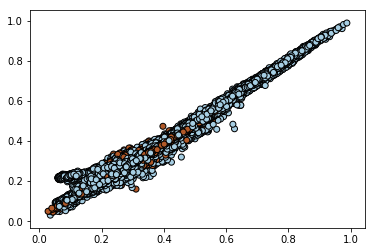

In [64]:
# Plot 2d features using groundtruth to color the datapoints
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

In [46]:
# train a logistic regression classifier

from sklearn import linear_model

# we create an instance of the classifier and fit the data
logreg = linear_model.LogisticRegression(C=1e5, class_weight="balanced")
logreg.fit(X, Y)

LogisticRegression(C=100000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [119]:
#train a svm classifier

from sklearn.svm import SVC

clf = SVC(kernel = "sigmoid")
clf.fit(X, Y)



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [120]:
#predict with SVM
Pred = clf.predict(X)

# Get non-zeros in prediction and grountruth arrays
Zn = np.nonzero(Pred)[0]
Yn = np.nonzero(Y)[0]

TPR = len(list(set(Yn) & set(Zn))) / float(len(Pred))
print('True positive rate = ' + str(TPR))


True positive rate = 0.0


In [121]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(splitter = "best")
clf.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [124]:
#predict 
Pred = clf.predict(X)

# Get non-zeros in prediction and grountruth arrays
Zn = np.nonzero(Pred)[0]
Yn = np.nonzero(Y)[0]

score_ = clf.score(X,Y)

TPR = len(list(set(Yn) & set(Zn))) / float(len(Pred))
print('True positive rate = ' + str(TPR))
print("score = "+str(score_))


True positive rate = 0.27108
score = 1.0


In [18]:
# Predict on the training set
Z = logreg.predict(X)

# Get non-zeros in prediction and grountruth arrays
Zn = np.nonzero(Z)[0]
Yn = np.nonzero(Y)[0]

TPR = len(list(set(Yn) & set(Zn))) / float(len(Z))
print('True positive rate = ' + str(TPR))

True positive rate = 0.19296


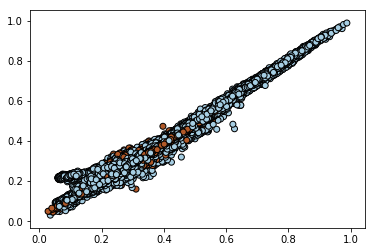

In [67]:
# Plot features using predictions to color datapoints
plt.scatter(X[:, 0], X[:, 1], c=Pred, edgecolors='k', cmap=plt.cm.Paired)

In [78]:
# Convert array of labels to an image

def label_to_img(imgwidth, imgheight, w, h, labels):
    im = np.zeros([imgwidth, imgheight])
    idx = 0
    for i in range(0,imgheight,h):
        for j in range(0,imgwidth,w):
            im[j:j+w, i:i+h] = labels[idx]
            idx = idx + 1
    return im

def make_img_overlay(img, predicted_img):
    w = img.shape[0]
    h = img.shape[1]
    color_mask = np.zeros((w, h, 3), dtype=np.uint8)
    color_mask[:,:,0] = predicted_img*255

    img8 = img_float_to_uint8(img)
    background = Image.fromarray(img8, 'RGB').convert("RGBA")
    overlay = Image.fromarray(color_mask, 'RGB').convert("RGBA")
    new_img = Image.blend(background, overlay, 0.2)
    return new_img
    

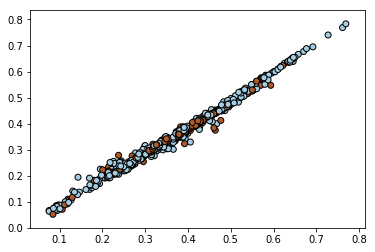

In [114]:
# Run prediction on the img_idx-th image
img_idx = 87

Xi = extract_img_features(image_dir + files[img_idx])
Zi = clf.predict(Xi)
plt.scatter(Xi[:, 0], Xi[:, 1], c=Zi, edgecolors='k', cmap=plt.cm.Paired)

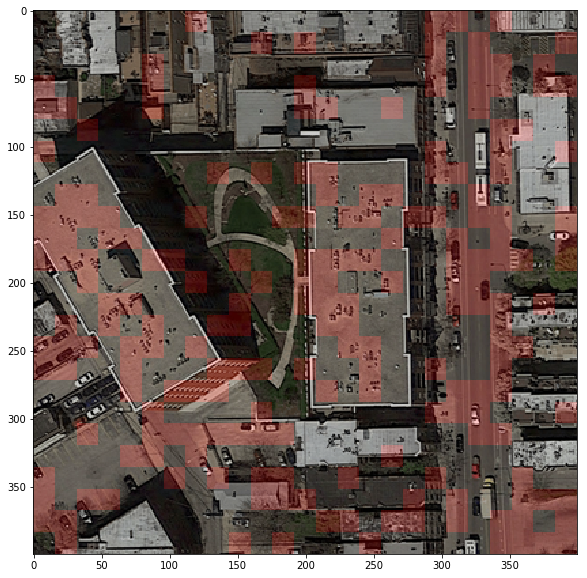

In [115]:
# Display prediction as an image

w = gt_imgs[img_idx].shape[0]
h = gt_imgs[img_idx].shape[1]
predicted_im = label_to_img(w, h, patch_size, patch_size, Zi)
cimg = concatenate_images(imgs[img_idx], predicted_im)
fig1 = plt.figure(figsize=(10, 10)) # create a figure with the default size 
plt.imshow(cimg, cmap='Greys_r')

new_img = make_img_overlay(imgs[img_idx], predicted_im)

plt.imshow(new_img)
